# Problem 2: Logistic Regression and LDA


You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

Dataset for Problem 2: Holiday_Package.csv

In [1]:
#Import Libraries

In [59]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# importing ploting libraries
import matplotlib.pyplot as plt   
#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split

# calculate accuracy measures and confusion matrix
from sklearn import metrics

from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

# 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [3]:
df = pd.read_csv("Holiday_Package.csv")

In [4]:
df

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no
...,...,...,...,...,...,...,...,...
867,868,no,40030,24,4,2,1,yes
868,869,yes,32137,48,8,0,0,yes
869,870,no,25178,24,6,2,0,yes
870,871,yes,55958,41,10,0,1,yes


In [5]:
df.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [6]:
df.shape

(872, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [8]:
# Given dataset have 872 observations and 8 features.
# columns 'Unnamed: 0' is a serial number and not required for modeling. Hence we will drop the column.
# Holiday_Package is the Target variable and rest all columns are independent varianles.
# Dataset have 6 features of datatype-Int64 and 2 features of datatype object
# There seems to be No NULL values present in the datset.

In [9]:
df.isna().sum()

Unnamed: 0           0
Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [10]:
df = df.drop("Unnamed: 0",axis=1)        #Drop unwanted column Unnamed: 0

In [11]:
df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [12]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Holliday_Package,872,2,no,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,872,NaN,NaN,NaN,47729.2,23418.7,1322,35324,41903.5,53469.5,236961
age,872,NaN,NaN,NaN,39.9553,10.5517,20,32,39,48,62
educ,872,NaN,NaN,NaN,9.30734,3.03626,1,8,9,12,21
no_young_children,872,NaN,NaN,NaN,0.311927,0.61287,0,0,0,0,3
no_older_children,872,NaN,NaN,NaN,0.982798,1.08679,0,0,1,2,6
foreign,872,2,no,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# From Descriptive statistics , we cans ay that average slary of company employes is 47729.2
# Compny has employes of minimum age from 20 to 62 years.
# 50% employees have only one older children.
# maximum employees has not opted for foreign package.

In [14]:
dups = df.duplicated()

In [15]:
print(dups.sum())

0


In [16]:
# There are no duplicate rows in the present dataset.

In [17]:
df.columns

Index(['Holliday_Package', 'Salary', 'age', 'educ', 'no_young_children',
       'no_older_children', 'foreign'],
      dtype='object')

## Univariate analysis

In [18]:
df_num = df[['Salary', 'age', 'educ', 'no_young_children','no_older_children']]

In [19]:
df_num.head()

,Salary,age,educ,no_young_children,no_older_children
0,48412,30,8,1,1
1,37207,45,8,0,1
2,58022,46,9,0,0
3,66503,31,11,2,0
4,66734,44,12,0,2


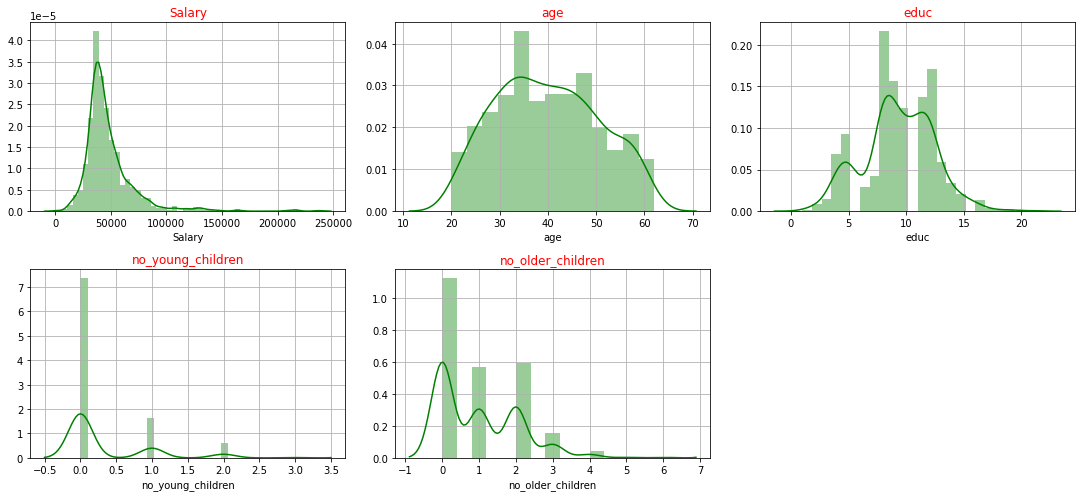

In [20]:
fig = plt.figure(figsize=(15,10))

for i in range(0,len(df_num.columns)):
    ax = fig.add_subplot(3,3,i+1)
    sns.distplot(df_num[df_num.columns[i]],color='g')
    ax.set_title(df_num.columns[i],color='Red')
    plt.grid()

plt.tight_layout()

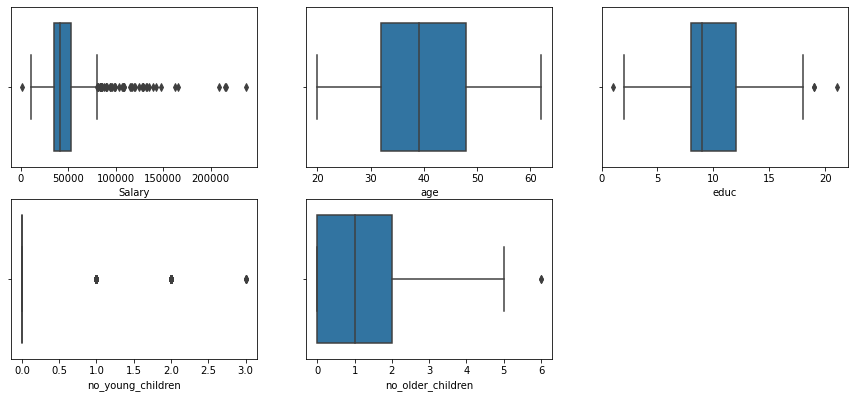

In [21]:
fig = plt.figure(figsize=(15,10))

for i in range(0,len(df_num.columns)):
    ax = fig.add_subplot(3,3,i+1)
    sns.boxplot(df_num[df_num.columns[i]])


In [22]:
# Column age seems to be normally distributed without any outliers

## Bivariate analysis

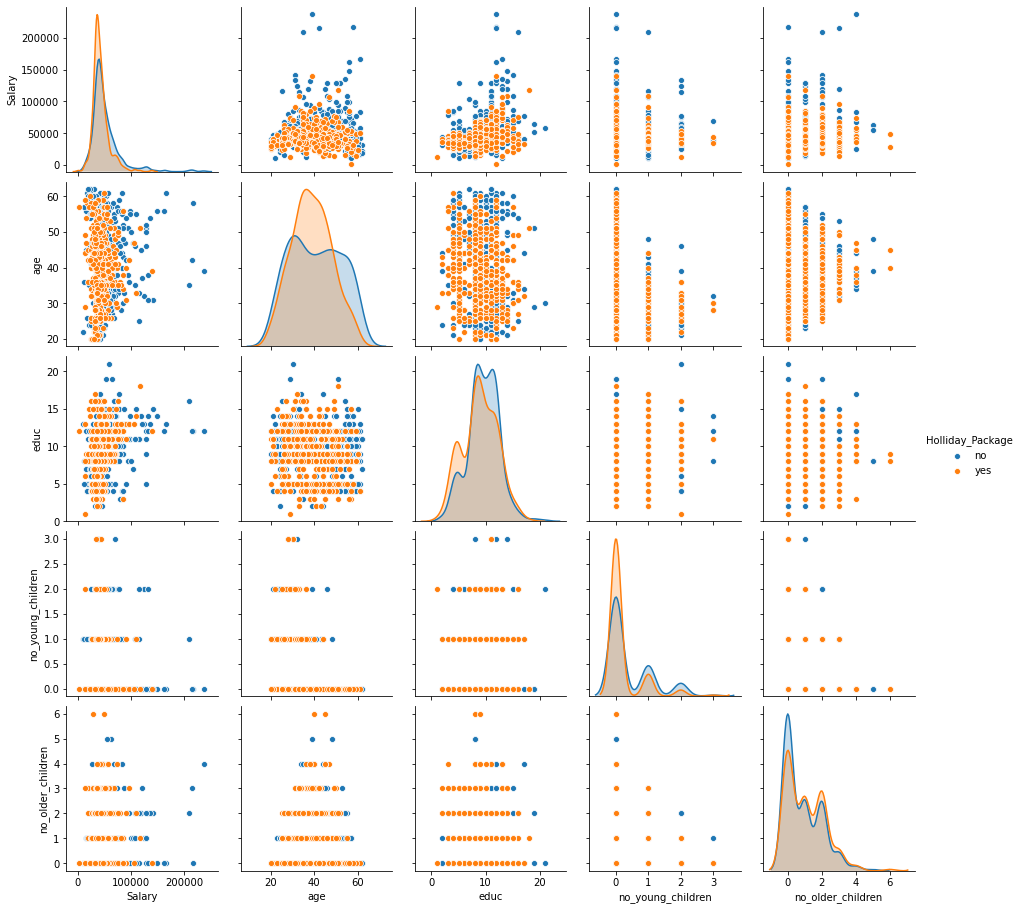

In [23]:
# Pairplot using sns
sns.pairplot(df ,diag_kind='kde' ,hue='Holliday_Package');

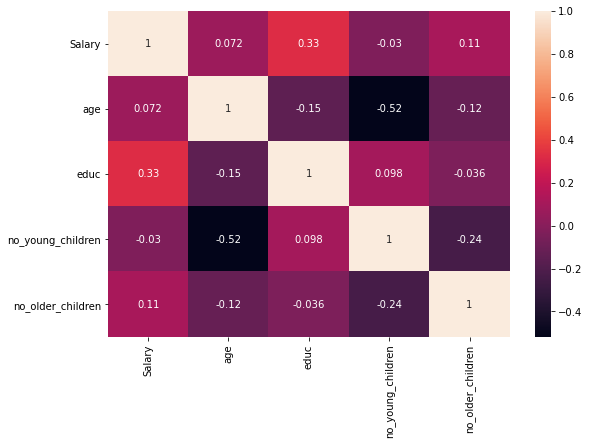

In [24]:
plt.figure(figsize=(9,6))
sns.heatmap(df.corr(),annot=True)

In [25]:
# There is no muticollinearity in dataset.

In [26]:
## Categorical variables analysis

In [27]:
df_cat = df[['Holliday_Package','foreign']]

In [28]:
df_cat.head()

,Holliday_Package,foreign
0,no,no
1,yes,no
2,no,no
3,no,no
4,no,no


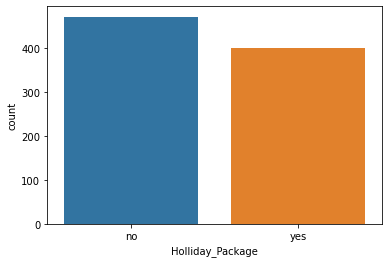

In [29]:
sns.countplot(df["Holliday_Package"])

In [30]:
# Number of people who opted for holiday package is less compared to non-opted.

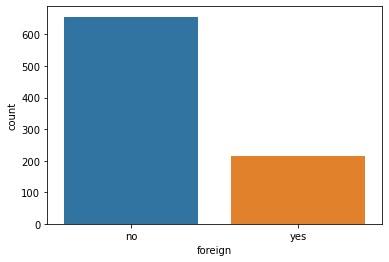

In [31]:
sns.countplot(df["foreign"])

In [32]:
# Number of non-foreigners is more than foreigners.

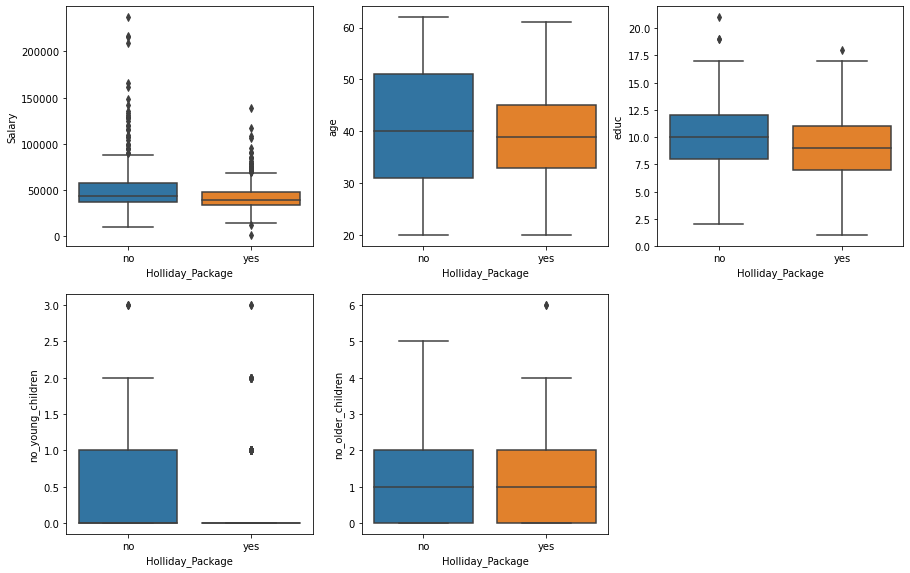

In [33]:
fig = plt.figure(figsize=(15,15))

for i in range(0,len(df_num.columns)):
    ax = fig.add_subplot(3,3,i+1)
    sns.boxplot(y = df_num[df_num.columns[i]],data=df,x=df['Holliday_Package'])

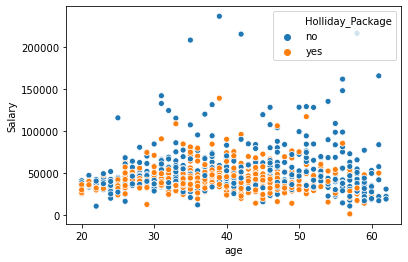

In [34]:
#sns.scatterplot(x=df["age"],y=df["Salary"],hue=["Holliday_Package"],data=df)

sns.scatterplot(data = df, x='age',y='Salary', hue = 'Holliday_Package')

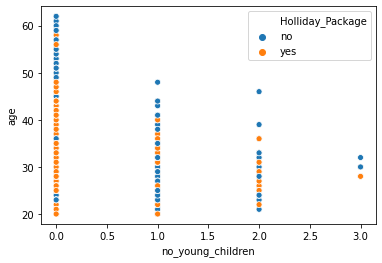

In [35]:
sns.scatterplot(data = df, x='no_young_children',y='age', hue = 'Holliday_Package')

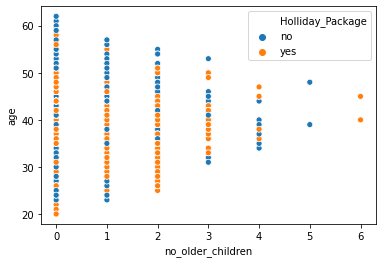

In [36]:
sns.scatterplot(data = df, x='no_older_children',y='age', hue = 'Holliday_Package')

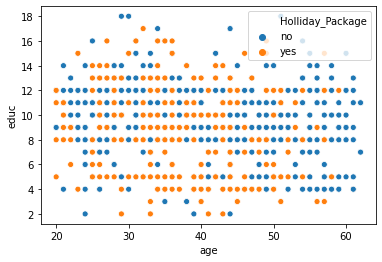

In [95]:
sns.scatterplot(data = df, x='age',y='educ', hue = 'Holliday_Package')

### Remove Outliers

In [38]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [39]:
for column in df_num.columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

In [40]:
df_num = df[['Salary', 'age', 'educ', 'no_young_children','no_older_children']]

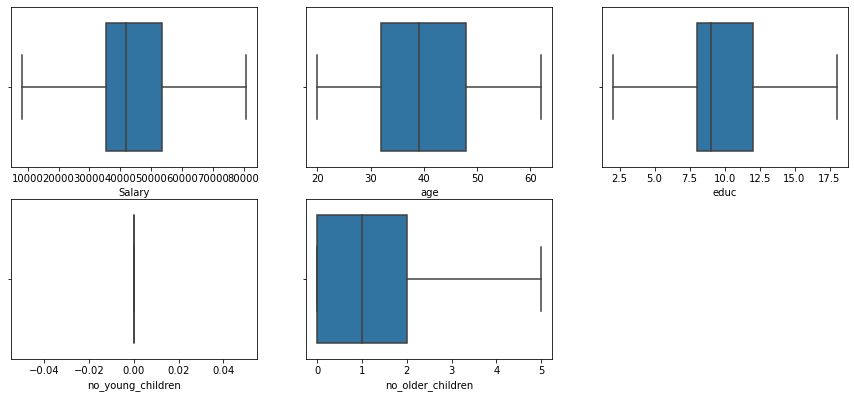

In [41]:
fig = plt.figure(figsize=(15,10))

for i in range(0,len(df_num.columns)):
    ax = fig.add_subplot(3,3,i+1)
    sns.boxplot(df_num[df_num.columns[i]])

# 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

In [42]:
df["Holliday_Package"].value_counts()

no     471
yes    401
Name: Holliday_Package, dtype: int64

In [43]:
df["Holliday_Package"].value_counts(normalize=True)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

### Encode the data

In [44]:
data = pd.get_dummies(df, columns=['Holliday_Package','foreign'], drop_first = True)

In [45]:
data.head()

,Salary,age,educ,no_young_children,no_older_children,Holliday_Package_yes,foreign_yes
0,48412.0,30.0,8.0,0.0,1.0,0,0
1,37207.0,45.0,8.0,0.0,1.0,1,0
2,58022.0,46.0,9.0,0.0,0.0,0,0
3,66503.0,31.0,11.0,0.0,0.0,0,0
4,66734.0,44.0,12.0,0.0,2.0,0,0


### Split the data

In [46]:
X = data.drop('Holliday_Package_yes', axis=1)

y = data['Holliday_Package_yes']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

### Logistic regression model

In [48]:
logistic_model = LogisticRegression(max_iter=100000,tol=1e-06)

In [49]:
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=100000, tol=1e-06)

In [50]:
logistic_model.score(X_train,y_train)

0.5393442622950819

In [51]:
logistic_model.score(X_test,y_test)

0.5419847328244275

### LDA model

In [52]:
lda_model = LinearDiscriminantAnalysis()

In [53]:
lda_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [54]:
lda_model.score(X_train,y_train)

0.6327868852459017

In [55]:
lda_model.score(X_test,y_test)

0.6564885496183206

# 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

### Logistic Regression

In [57]:
ytrain_predict_lr = logistic_model.predict(X_train)
ytest_predict_lr = logistic_model.predict(X_test)

In [61]:
# Accuracy

In [63]:
lr_train_acc=logistic_model.score(X_train,y_train) 
lr_train_acc

0.5393442622950819

In [70]:
lr_test_acc=logistic_model.score(X_test,y_test) 
lr_test_acc

0.5419847328244275

In [65]:
# Confusion Matrix

Text(0.5, 1.0, 'Confustion matric for Train Data \n')

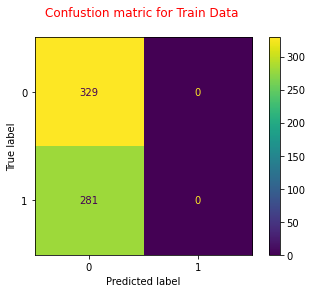

In [96]:
plot_confusion_matrix(logistic_model,X_train,y_train)
plt.title("Confustion matric for Train Data \n", color='Red')

Text(0.5, 1.0, 'Confustion matric for Test Data \n')

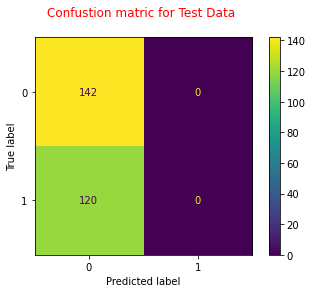

In [97]:
plot_confusion_matrix(logistic_model,X_test,y_test)
plt.title("Confustion matric for Test Data \n", color='Red')

In [67]:
# AUC & ROC curve

AUC: 0.593


Text(0.5, 1.0, 'Train \n')

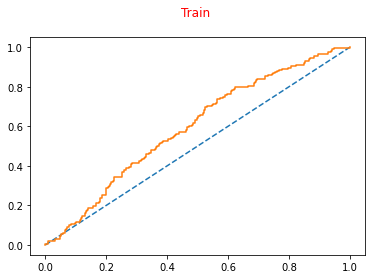

In [98]:
# predict probabilities
probs_lr = logistic_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_lr = probs_lr[:, 1]

# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs_lr)
print('AUC: %.3f' % lr_train_auc)

# calculate roc curve
lr_train_fpr, lr_train_tpr, lr_train_thresholds = roc_curve(y_train, probs_lr)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(lr_train_fpr, lr_train_tpr)

plt.title("Train \n",color='red')

AUC: 0.593


Text(0.5, 1.0, 'Test \n')

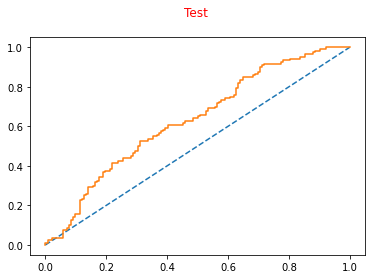

In [101]:
# predict probabilities
probs_lr = logistic_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_lr = probs_lr[:, 1]

# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs_lr)
print('AUC: %.3f' % lr_train_auc)

# calculate roc curve
lr_test_fpr, lr_test_tpr, lr_test_thresholds = roc_curve(y_test, probs_lr)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(lr_test_fpr, lr_test_tpr)

plt.title("Test \n",color='red')

### Linear Discriminant analysis

In [73]:
# Accuracy

In [91]:
lda_train_acc=lda_model.score(X_train,y_train) 
lda_train_acc

0.6327868852459017

In [92]:
lda_test_acc=lda_model.score(X_test,y_test) 
lda_test_acc

0.6564885496183206

In [76]:
# COnfusion matrix

Text(0.5, 1.0, 'TRAIN set \n')

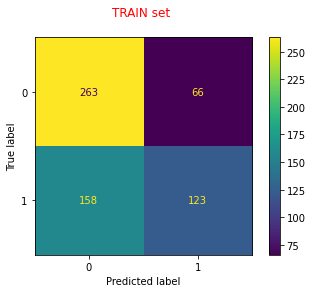

In [82]:
plot_confusion_matrix(lda_model,X_train,y_train)
plt.title("TRAIN set \n", color='red')

Text(0.5, 1.0, 'TEST set \n')

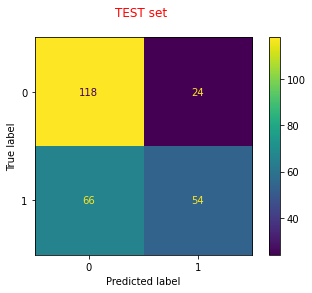

In [87]:
plot_confusion_matrix(lda_model,X_test,y_test)
plt.title("TEST set \n", color='red')

In [83]:
# AUC & ROC Curve

AUC: 0.661


Text(0.5, 1.0, 'Train \n')

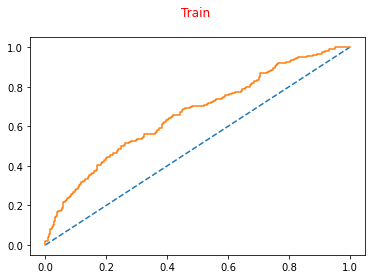

In [102]:
# predict probabilities
probs_lda = lda_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_lda = probs_lda[:, 1]

# calculate AUC
lda_train_auc = roc_auc_score(y_train, probs_lda)
print('AUC: %.3f' % lda_train_auc)

# calculate roc curve
lda_train_fpr, lda_train_tpr, lda_train_thresholds = roc_curve(y_train, probs_lda)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr)

plt.title("Train \n",color='red')

AUC: 0.675


Text(0.5, 1.0, 'Test \n')

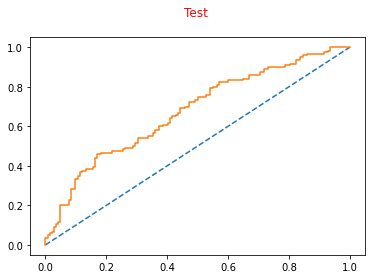

In [103]:
# predict probabilities
probs_lda = lda_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_lda = probs_lda[:, 1]

# calculate AUC
lda_test_auc = roc_auc_score(y_test, probs_lda)
print('AUC: %.3f' % lda_test_auc)

# calculate roc curve
lda_test_fpr, lda_test_tpr, lda_test_thresholds = roc_curve(y_test, probs_lda)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr)

plt.title("Test \n",color='red')

In [93]:
index=['Accuracy', 'AUC']
data = pd.DataFrame({'LR Train':[lr_train_acc,lr_train_auc],
        'LR Test':[lr_test_acc,lr_test_auc],
       'LDA Train':[lda_train_acc,lda_train_auc],
        'LDA Test':[lda_test_acc,lda_test_auc]},index=index)
round(data,2)

,LR Train,LR Test,LDA Train,LDA Test
Accuracy,0.63,0.66,0.63,0.66
AUC,0.59,0.63,0.66,0.68


From above stats we can say that LDA Model works better that LR-Logistic regression model.

# 2.4 Inference: Basis on these predictions, what are the insights and recommendations.
Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.

- From Statistic result one can use LDA-linear discriminant analysis, to identify whether an employee would opt for holiday package or not.

- Age and Salary are most important factors in order to categorize for holiday package opt.

- Maximum people who opt for holiday package are in age between 30 to 50. So company can come up with new holiday package offering for senior citizen above age 50 i.e.VAcation covering devotional places.
Also company can offer adventure holiday packages to atttract people below age 30.

- Comapany can offer special holiday packages for people having slary more than 100000, to increse the customers.

- Also company can offer special Family vacation packages for employees where no of older children is more than 2.